In [16]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
#import pandas.io.data as web
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import Normalizer, StandardScaler
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('dji.csv', index_col = 'Date')
df.index = pd.to_datetime(df.index)
df = df.resample('W-MON').last()
stox = list(df.columns)
stox.remove('^DJI')
ind = '^DJI'
df = df[df.index > pd.to_datetime('1-1-2010')]
df = df[df.index < pd.to_datetime('17-4-2014')]

In [19]:
df['ret'] = df['^DJI'].pct_change().fillna(0.1)

In [20]:
df.head()

,PFE,UTX,DIS,V,BA,PG,JNJ,KO,UNH,MCD,...,INTC,GS,AXP,JPM,DD,XOM,CAT,CVX,^DJI,ret
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,14.475359,60.278857,29.170142,20.872737,46.814975,48.583351,51.509368,22.920968,28.272952,49.824656,...,16.442681,157.438422,36.563485,35.942120,26.040642,56.187171,47.809265,60.612343,10583.959961,0.100000
2010-01-11,14.398891,60.724874,28.524343,20.543566,50.723166,47.852058,51.143037,22.611550,29.519363,49.459583,...,16.497806,156.055783,37.216394,37.351286,26.040642,57.121593,52.365637,62.007669,10663.990234,0.007561
2010-01-18,14.903579,60.581809,27.833064,20.399110,50.681501,48.344886,51.413801,22.619587,30.263626,49.427836,...,16.379683,150.279654,38.042027,36.638316,25.850618,56.154668,49.426187,60.742680,10609.650391,-0.005096
2010-01-25,14.414185,57.720603,27.214551,19.425806,48.148259,48.539901,50.346665,21.840016,29.591101,50.070685,...,16.001690,140.974149,33.913854,32.888927,24.946113,53.505785,45.332003,57.154699,10196.860352,-0.038907
2010-02-01,14.368305,56.845416,26.850721,19.811813,51.414809,49.628707,50.243136,21.852073,29.707673,50.705595,...,15.442577,139.291345,34.290772,33.241220,25.584589,53.773925,43.523326,56.411035,10185.530273,-0.001111


In [21]:
df.loc[:, 'new_ret'] = df.apply(lambda r: 0.1 if r['ret'] < -0.08 else r['ret'], axis = 1)
df['new_index'] = df.loc[df.index[0], '^DJI']

In [22]:
df.head()

,PFE,UTX,DIS,V,BA,PG,JNJ,KO,UNH,MCD,...,AXP,JPM,DD,XOM,CAT,CVX,^DJI,ret,new_ret,new_index
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,14.475359,60.278857,29.170142,20.872737,46.814975,48.583351,51.509368,22.920968,28.272952,49.824656,...,36.563485,35.942120,26.040642,56.187171,47.809265,60.612343,10583.959961,0.100000,0.100000,10583.959961
2010-01-11,14.398891,60.724874,28.524343,20.543566,50.723166,47.852058,51.143037,22.611550,29.519363,49.459583,...,37.216394,37.351286,26.040642,57.121593,52.365637,62.007669,10663.990234,0.007561,0.007561,10583.959961
2010-01-18,14.903579,60.581809,27.833064,20.399110,50.681501,48.344886,51.413801,22.619587,30.263626,49.427836,...,38.042027,36.638316,25.850618,56.154668,49.426187,60.742680,10609.650391,-0.005096,-0.005096,10583.959961
2010-01-25,14.414185,57.720603,27.214551,19.425806,48.148259,48.539901,50.346665,21.840016,29.591101,50.070685,...,33.913854,32.888927,24.946113,53.505785,45.332003,57.154699,10196.860352,-0.038907,-0.038907,10583.959961
2010-02-01,14.368305,56.845416,26.850721,19.811813,51.414809,49.628707,50.243136,21.852073,29.707673,50.705595,...,34.290772,33.241220,25.584589,53.773925,43.523326,56.411035,10185.530273,-0.001111,-0.001111,10583.959961


In [23]:
for i in range(len(df.index)):
    if i > 0:
#        print (1.0-df.loc[df.index[i], 'new_ret'], df.loc[df.index[i-1], 'new_index'])
        df.loc[df.index[i], 'new_index'] = df.loc[df.index[i-1], 'new_index']*(1.0+df.loc[df.index[i], 'new_ret'])

In [24]:
df.head()

,PFE,UTX,DIS,V,BA,PG,JNJ,KO,UNH,MCD,...,AXP,JPM,DD,XOM,CAT,CVX,^DJI,ret,new_ret,new_index
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,14.475359,60.278857,29.170142,20.872737,46.814975,48.583351,51.509368,22.920968,28.272952,49.824656,...,36.563485,35.942120,26.040642,56.187171,47.809265,60.612343,10583.959961,0.100000,0.100000,10583.959961
2010-01-11,14.398891,60.724874,28.524343,20.543566,50.723166,47.852058,51.143037,22.611550,29.519363,49.459583,...,37.216394,37.351286,26.040642,57.121593,52.365637,62.007669,10663.990234,0.007561,0.007561,10663.990234
2010-01-18,14.903579,60.581809,27.833064,20.399110,50.681501,48.344886,51.413801,22.619587,30.263626,49.427836,...,38.042027,36.638316,25.850618,56.154668,49.426187,60.742680,10609.650391,-0.005096,-0.005096,10609.650391
2010-01-25,14.414185,57.720603,27.214551,19.425806,48.148259,48.539901,50.346665,21.840016,29.591101,50.070685,...,33.913854,32.888927,24.946113,53.505785,45.332003,57.154699,10196.860352,-0.038907,-0.038907,10196.860352
2010-02-01,14.368305,56.845416,26.850721,19.811813,51.414809,49.628707,50.243136,21.852073,29.707673,50.705595,...,34.290772,33.241220,25.584589,53.773925,43.523326,56.411035,10185.530273,-0.001111,-0.001111,10185.530273


In [5]:
en = StandardScaler()
df['^DJI'] = en.fit_transform(df['^DJI'].to_frame())

In [6]:
for s in stox:
    en1 = StandardScaler()
    df[s] = en1.fit_transform(df[s].to_frame())
    
df['new_index'] = en.transform(df['new_index'].to_frame())

In [7]:
train = df[df.index < pd.to_datetime('17-04-2014')]
test = df[(df.index >= pd.to_datetime('17-4-2013')) & (df.index < pd.to_datetime('17-4-2014'))]

def create_dataset(df):
    dataX = []
    for c in df.columns:
        x = df.loc[:, c].as_matrix()
        dataX.append(x)
    return np.array(dataX), np.array(dataX)

In [8]:
#train_x, train_y = create_dataset(train)
#test_x, test_y = create_dataset(test)

#autoencoder = Sequential()
#autoencoder.add(Dense(output_dim=50, input_dim=250))
#autoencoder.add(Activation('tanh'))
#autoencoder.add(Dense(output_dim=250, input_dim=50))
#autoencoder.compile(loss='mean_squared_error', optimizer='rmsprop')
#autoencoder.fit(train_x, train_y, nb_epoch=1000, batch_size=10, verbose = 0)
#
#for i in range(train_x.shape[0]):
#    z = autoencoder.predict(train_x[i].reshape(1,250))
#    x = train_x[i]
#    if i < len(stox):
#        print (stox[i], np.sum(np.square(z-x)))
        
def create_dataset_index(df):
    dataX = []
    dataY = []
    for i in df.index:
        x = df.loc[i, stox].as_matrix()
        dataX.append(x)
        y = df.loc[i, '^DJI']
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [9]:
#train = df[df.index < pd.to_datetime('04-01-2014')]
train_x, train_y = create_dataset_index(train)

model = Sequential()
model.add(Dense(units=20, input_dim=30))
model.add(Activation('tanh'))
model.add(Dropout(0.1))
model.add(Dense(units=10, input_dim=20))
model.add(Activation('tanh'))
model.add(Dropout(0.1))
model.add(Dense(units=5, input_dim=10))
model.add(Activation('tanh'))
model.add(Dropout(0.1))
model.add(Dense(units=1, input_dim=5))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

D:\py36\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [10]:
model.fit(train_x, train_y, epochs=2000, batch_size=40, verbose = 1)

Epoch 1/2000
224/224 [==============================] - 1s 4ms/step - loss: 0.5605
Epoch 2/2000
224/224 [==============================] - 0s 31us/step - loss: 0.3619
Epoch 3/2000
224/224 [==============================] - 0s 31us/step - loss: 0.3421
Epoch 4/2000
224/224 [==============================] - 0s 45us/step - loss: 0.3053
Epoch 5/2000
224/224 [==============================] - 0s 27us/step - loss: 0.2334
Epoch 6/2000
224/224 [==============================] - 0s 31us/step - loss: 0.2097
Epoch 7/2000
224/224 [==============================] - 0s 31us/step - loss: 0.1810
Epoch 8/2000
224/224 [==============================] - 0s 40us/step - loss: 0.2171
Epoch 9/2000
224/224 [==============================] - 0s 31us/step - loss: 0.1790
Epoch 10/2000
224/224 [==============================] - 0s 36us/step - loss: 0.1696
Epoch 11/2000
224/224 [==============================] - 0s 27us/step - loss: 0.1711
Epoch 12/2000
224/224 [==============================] - 0s 40us/step - los

224/224 [==============================] - 0s 31us/step - loss: 0.0603
Epoch 98/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0647
Epoch 99/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0450
Epoch 100/2000
224/224 [==============================] - 0s 22us/step - loss: 0.0633
Epoch 101/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0587
Epoch 102/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0507
Epoch 103/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0551
Epoch 104/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0554
Epoch 105/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0570
Epoch 106/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0499
Epoch 107/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0541
Epoch 108/2000
224/224 [==============================] - 0s 36us/step 

224/224 [==============================] - 0s 40us/step - loss: 0.0411
Epoch 192/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0510
Epoch 193/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0367
Epoch 194/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0515
Epoch 195/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0481
Epoch 196/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0390
Epoch 197/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0445
Epoch 198/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0367
Epoch 199/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0508
Epoch 200/2000
224/224 [==============================] - 0s 45us/step - loss: 0.0438
Epoch 201/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0602
Epoch 202/2000
224/224 [==============================] - 0s 45us/ste

224/224 [==============================] - 0s 27us/step - loss: 0.0386
Epoch 287/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0361
Epoch 288/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0518
Epoch 289/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0362
Epoch 290/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0390
Epoch 291/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0466
Epoch 292/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0533
Epoch 293/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0415
Epoch 294/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0483
Epoch 295/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0587
Epoch 296/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0396
Epoch 297/2000
224/224 [==============================] - 0s 36us/ste

224/224 [==============================] - 0s 27us/step - loss: 0.0475
Epoch 382/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0398
Epoch 383/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0487
Epoch 384/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0416
Epoch 385/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0446
Epoch 386/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0404
Epoch 387/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0425
Epoch 388/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0398
Epoch 389/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0453
Epoch 390/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0407
Epoch 391/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0405
Epoch 392/2000
224/224 [==============================] - 0s 31us/ste

224/224 [==============================] - 0s 27us/step - loss: 0.0373
Epoch 477/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0476
Epoch 478/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0379
Epoch 479/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0454
Epoch 480/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0440
Epoch 481/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0372
Epoch 482/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0325
Epoch 483/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0460
Epoch 484/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0427
Epoch 485/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0385
Epoch 486/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0448
Epoch 487/2000
224/224 [==============================] - 0s 31us/ste

224/224 [==============================] - 0s 31us/step - loss: 0.0423
Epoch 572/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0302
Epoch 573/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0307
Epoch 574/2000
224/224 [==============================] - 0s 45us/step - loss: 0.0463
Epoch 575/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0355
Epoch 576/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0406
Epoch 577/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0373
Epoch 578/2000
224/224 [==============================] - 0s 45us/step - loss: 0.0401
Epoch 579/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0375
Epoch 580/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0415
Epoch 581/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0369
Epoch 582/2000
224/224 [==============================] - 0s 36us/ste

224/224 [==============================] - 0s 22us/step - loss: 0.0391
Epoch 667/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0518
Epoch 668/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0410
Epoch 669/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0458
Epoch 670/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0425
Epoch 671/2000
224/224 [==============================] - 0s 22us/step - loss: 0.0411
Epoch 672/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0385
Epoch 673/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0340
Epoch 674/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0292
Epoch 675/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0428
Epoch 676/2000
224/224 [==============================] - 0s 45us/step - loss: 0.0346
Epoch 677/2000
224/224 [==============================] - 0s 27us/ste

224/224 [==============================] - 0s 36us/step - loss: 0.0384
Epoch 762/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0492
Epoch 763/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0521
Epoch 764/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0355
Epoch 765/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0423
Epoch 766/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0374
Epoch 767/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0352
Epoch 768/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0365
Epoch 769/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0315
Epoch 770/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0363
Epoch 771/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0390
Epoch 772/2000
224/224 [==============================] - 0s 36us/ste

224/224 [==============================] - 0s 22us/step - loss: 0.0310
Epoch 857/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0406
Epoch 858/2000
224/224 [==============================] - 0s 22us/step - loss: 0.0312
Epoch 859/2000
224/224 [==============================] - 0s 22us/step - loss: 0.0398
Epoch 860/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0405
Epoch 861/2000
224/224 [==============================] - 0s 22us/step - loss: 0.0401
Epoch 862/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0411
Epoch 863/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0340
Epoch 864/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0346
Epoch 865/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0423
Epoch 866/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0293
Epoch 867/2000
224/224 [==============================] - 0s 27us/ste

224/224 [==============================] - 0s 31us/step - loss: 0.0403
Epoch 952/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0408
Epoch 953/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0452
Epoch 954/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0351
Epoch 955/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0325
Epoch 956/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0390
Epoch 957/2000
224/224 [==============================] - 0s 28us/step - loss: 0.0444
Epoch 958/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0399
Epoch 959/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0403
Epoch 960/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0307
Epoch 961/2000
224/224 [==============================] - ETA: 0s - loss: 0.008 - 0s 31us/step - loss: 0.0329
Epoch 962/2000
224/224 [=====================

224/224 [==============================] - 0s 36us/step - loss: 0.0355
Epoch 1046/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0490
Epoch 1047/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0359
Epoch 1048/2000
224/224 [==============================] - 0s 22us/step - loss: 0.0302
Epoch 1049/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0358
Epoch 1050/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0320
Epoch 1051/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0307
Epoch 1052/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0435
Epoch 1053/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0328
Epoch 1054/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0377
Epoch 1055/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0282
Epoch 1056/2000
224/224 [==============================] - 

224/224 [==============================] - 0s 31us/step - loss: 0.0412
Epoch 1140/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0410
Epoch 1141/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0372
Epoch 1142/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0353
Epoch 1143/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0421
Epoch 1144/2000
224/224 [==============================] - 0s 45us/step - loss: 0.0364
Epoch 1145/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0360
Epoch 1146/2000
224/224 [==============================] - 0s 45us/step - loss: 0.0542
Epoch 1147/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0390
Epoch 1148/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0379
Epoch 1149/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0445
Epoch 1150/2000
224/224 [==============================] - 

224/224 [==============================] - 0s 40us/step - loss: 0.0342
Epoch 1234/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0421
Epoch 1235/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0397
Epoch 1236/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0375
Epoch 1237/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0378
Epoch 1238/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0446
Epoch 1239/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0364
Epoch 1240/2000
224/224 [==============================] - 0s 53us/step - loss: 0.0439
Epoch 1241/2000
224/224 [==============================] - 0s 53us/step - loss: 0.0345
Epoch 1242/2000
224/224 [==============================] - 0s 45us/step - loss: 0.0336
Epoch 1243/2000
224/224 [==============================] - 0s 45us/step - loss: 0.0323
Epoch 1244/2000
224/224 [==============================] - 

224/224 [==============================] - 0s 40us/step - loss: 0.0405
Epoch 1327/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0340
Epoch 1328/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0330
Epoch 1329/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0392
Epoch 1330/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0368
Epoch 1331/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0385
Epoch 1332/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0379
Epoch 1333/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0351
Epoch 1334/2000
224/224 [==============================] - 0s 45us/step - loss: 0.0487
Epoch 1335/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0312
Epoch 1336/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0307
Epoch 1337/2000
224/224 [==============================] - 

224/224 [==============================] - 0s 31us/step - loss: 0.0398
Epoch 1421/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0346
Epoch 1422/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0351
Epoch 1423/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0405
Epoch 1424/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0329
Epoch 1425/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0408
Epoch 1426/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0354
Epoch 1427/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0343
Epoch 1428/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0312
Epoch 1429/2000
224/224 [==============================] - ETA: 0s - loss: 0.041 - 0s 36us/step - loss: 0.0453
Epoch 1430/2000
224/224 [==============================] - 0s 29us/step - loss: 0.0312
Epoch 1431/2000
224/224 [==========

224/224 [==============================] - 0s 31us/step - loss: 0.0364
Epoch 1515/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0364
Epoch 1516/2000
224/224 [==============================] - 0s 45us/step - loss: 0.0503
Epoch 1517/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0401
Epoch 1518/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0337
Epoch 1519/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0290
Epoch 1520/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0380
Epoch 1521/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0298
Epoch 1522/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0406
Epoch 1523/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0295
Epoch 1524/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0334
Epoch 1525/2000
224/224 [==============================] - 

224/224 [==============================] - 0s 36us/step - loss: 0.0423
Epoch 1609/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0330
Epoch 1610/2000
224/224 [==============================] - 0s 22us/step - loss: 0.0369
Epoch 1611/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0426
Epoch 1612/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0435
Epoch 1613/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0498
Epoch 1614/2000
224/224 [==============================] - 0s 45us/step - loss: 0.0287
Epoch 1615/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0248
Epoch 1616/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0276
Epoch 1617/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0338
Epoch 1618/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0283
Epoch 1619/2000
224/224 [==============================] - 

224/224 [==============================] - 0s 27us/step - loss: 0.0300
Epoch 1703/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0309
Epoch 1704/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0393
Epoch 1705/2000
224/224 [==============================] - 0s 22us/step - loss: 0.0352
Epoch 1706/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0392
Epoch 1707/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0370
Epoch 1708/2000
224/224 [==============================] - 0s 22us/step - loss: 0.0392
Epoch 1709/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0361
Epoch 1710/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0281
Epoch 1711/2000
224/224 [==============================] - 0s 22us/step - loss: 0.0348
Epoch 1712/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0349
Epoch 1713/2000
224/224 [==============================] - 

224/224 [==============================] - 0s 22us/step - loss: 0.0325
Epoch 1797/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0332
Epoch 1798/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0345
Epoch 1799/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0302
Epoch 1800/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0342
Epoch 1801/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0358
Epoch 1802/2000
224/224 [==============================] - 0s 22us/step - loss: 0.0370
Epoch 1803/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0406
Epoch 1804/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0478
Epoch 1805/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0329
Epoch 1806/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0298
Epoch 1807/2000
224/224 [==============================] - 

224/224 [==============================] - 0s 31us/step - loss: 0.0383
Epoch 1891/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0365
Epoch 1892/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0329
Epoch 1893/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0350
Epoch 1894/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0356
Epoch 1895/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0396
Epoch 1896/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0310
Epoch 1897/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0329
Epoch 1898/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0439
Epoch 1899/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0319
Epoch 1900/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0362
Epoch 1901/2000
224/224 [==============================] - 

224/224 [==============================] - 0s 31us/step - loss: 0.0328
Epoch 1985/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0353
Epoch 1986/2000
224/224 [==============================] - 0s 27us/step - loss: 0.0327
Epoch 1987/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0430
Epoch 1988/2000
224/224 [==============================] - ETA: 0s - loss: 0.023 - 0s 27us/step - loss: 0.0374
Epoch 1989/2000
224/224 [==============================] - 0s 36us/step - loss: 0.0370
Epoch 1990/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0284
Epoch 1991/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0406
Epoch 1992/2000
224/224 [==============================] - 0s 45us/step - loss: 0.0348
Epoch 1993/2000
224/224 [==============================] - 0s 31us/step - loss: 0.0409
Epoch 1994/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0322
Epoch 1995/2000
224/224 [==========

In [11]:
def create_dataset_new_index(df):
    dataX = []
    dataY = []
    for i in df.index:
        x = df.loc[i, stox].as_matrix()
        dataX.append(x)
        y = df.loc[i, 'new_index']
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [12]:
train_x, train_y = create_dataset_new_index(train)
new_model = Sequential()
new_model.add(Dense(units=20, input_dim=30))
new_model.add(Activation('tanh'))
new_model.add(Dropout(0.1))
new_model.add(Dense(units=10, input_dim=20))
new_model.add(Activation('tanh'))
new_model.add(Dropout(0.1))
new_model.add(Dense(units=5, input_dim=10))
new_model.add(Activation('tanh'))
new_model.add(Dropout(0.1))
new_model.add(Dense(units=1, input_dim=5))
new_model.compile(loss='mean_squared_error', optimizer='rmsprop')
new_model.fit(train_x, train_y, epochs=2000, batch_size=20, verbose = 1)

D:\py36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


Epoch 1/2000
224/224 [==============================] - 0s 957us/step - loss: 3.5161
Epoch 2/2000
224/224 [==============================] - 0s 53us/step - loss: 2.1023
Epoch 3/2000
224/224 [==============================] - 0s 45us/step - loss: 1.6043
Epoch 4/2000
224/224 [==============================] - 0s 40us/step - loss: 1.2423
Epoch 5/2000
224/224 [==============================] - 0s 58us/step - loss: 1.0394
Epoch 6/2000
224/224 [==============================] - 0s 53us/step - loss: 0.9010
Epoch 7/2000
224/224 [==============================] - 0s 58us/step - loss: 0.8734
Epoch 8/2000
224/224 [==============================] - 0s 62us/step - loss: 0.7321
Epoch 9/2000
224/224 [==============================] - 0s 62us/step - loss: 0.6112
Epoch 10/2000
224/224 [==============================] - 0s 58us/step - loss: 0.6426
Epoch 11/2000
224/224 [==============================] - 0s 71us/step - loss: 0.6254
Epoch 12/2000
224/224 [==============================] - 0s 58us/step - l

224/224 [==============================] - 0s 45us/step - loss: 0.1737
Epoch 98/2000
224/224 [==============================] - 0s 49us/step - loss: 0.2109
Epoch 99/2000
224/224 [==============================] - 0s 36us/step - loss: 0.2014
Epoch 100/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1624
Epoch 101/2000
224/224 [==============================] - 0s 49us/step - loss: 0.2115
Epoch 102/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1515
Epoch 103/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1633
Epoch 104/2000
224/224 [==============================] - 0s 40us/step - loss: 0.2023
Epoch 105/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1838
Epoch 106/2000
224/224 [==============================] - 0s 49us/step - loss: 0.2145
Epoch 107/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1918
Epoch 108/2000
224/224 [==============================] - 0s 49us/step 

224/224 [==============================] - 0s 53us/step - loss: 0.1421
Epoch 193/2000
224/224 [==============================] - 0s 62us/step - loss: 0.1543
Epoch 194/2000
224/224 [==============================] - 0s 62us/step - loss: 0.1583
Epoch 195/2000
224/224 [==============================] - 0s 67us/step - loss: 0.1821
Epoch 196/2000
224/224 [==============================] - ETA: 0s - loss: 0.078 - 0s 67us/step - loss: 0.1593
Epoch 197/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1815
Epoch 198/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1297
Epoch 199/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1400
Epoch 200/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1214
Epoch 201/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1733
Epoch 202/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1695
Epoch 203/2000
224/224 [=====================

224/224 [==============================] - 0s 45us/step - loss: 0.1596
Epoch 287/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1495
Epoch 288/2000
224/224 [==============================] - 0s 36us/step - loss: 0.1394
Epoch 289/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1565
Epoch 290/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1619
Epoch 291/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1501
Epoch 292/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1190
Epoch 293/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1698
Epoch 294/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1384
Epoch 295/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1321
Epoch 296/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1687
Epoch 297/2000
224/224 [==============================] - 0s 40us/ste

224/224 [==============================] - 0s 49us/step - loss: 0.1381
Epoch 382/2000
224/224 [==============================] - 0s 36us/step - loss: 0.1375
Epoch 383/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1274
Epoch 384/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1192
Epoch 385/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1111
Epoch 386/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1644
Epoch 387/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1128
Epoch 388/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1499
Epoch 389/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1169
Epoch 390/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1520
Epoch 391/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1372
Epoch 392/2000
224/224 [==============================] - 0s 40us/ste

224/224 [==============================] - 0s 58us/step - loss: 0.1139
Epoch 477/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1137
Epoch 478/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1344
Epoch 479/2000
224/224 [==============================] - 0s 62us/step - loss: 0.1597
Epoch 480/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1218
Epoch 481/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1018
Epoch 482/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1337
Epoch 483/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1349
Epoch 484/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1455
Epoch 485/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1129
Epoch 486/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1569
Epoch 487/2000
224/224 [==============================] - 0s 40us/ste

224/224 [==============================] - 0s 76us/step - loss: 0.1405
Epoch 572/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1370
Epoch 573/2000
224/224 [==============================] - 0s 58us/step - loss: 0.1315
Epoch 574/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1302
Epoch 575/2000
224/224 [==============================] - 0s 58us/step - loss: 0.1137
Epoch 576/2000
224/224 [==============================] - 0s 71us/step - loss: 0.1266
Epoch 577/2000
224/224 [==============================] - 0s 67us/step - loss: 0.1161
Epoch 578/2000
224/224 [==============================] - 0s 67us/step - loss: 0.1423
Epoch 579/2000
224/224 [==============================] - 0s 67us/step - loss: 0.1147
Epoch 580/2000
224/224 [==============================] - 0s 71us/step - loss: 0.1108
Epoch 581/2000
224/224 [==============================] - 0s 62us/step - loss: 0.1231
Epoch 582/2000
224/224 [==============================] - 0s 85us/ste

224/224 [==============================] - 0s 53us/step - loss: 0.1319
Epoch 667/2000
224/224 [==============================] - 0s 58us/step - loss: 0.1177
Epoch 668/2000
224/224 [==============================] - 0s 58us/step - loss: 0.1575
Epoch 669/2000
224/224 [==============================] - 0s 67us/step - loss: 0.1144
Epoch 670/2000
224/224 [==============================] - 0s 67us/step - loss: 0.1317
Epoch 671/2000
224/224 [==============================] - 0s 67us/step - loss: 0.1136
Epoch 672/2000
224/224 [==============================] - 0s 58us/step - loss: 0.1028
Epoch 673/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1141
Epoch 674/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1359
Epoch 675/2000
224/224 [==============================] - 0s 62us/step - loss: 0.1043
Epoch 676/2000
224/224 [==============================] - 0s 62us/step - loss: 0.1514
Epoch 677/2000
224/224 [==============================] - 0s 67us/ste

224/224 [==============================] - 0s 49us/step - loss: 0.1259
Epoch 762/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1327
Epoch 763/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1046
Epoch 764/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1242
Epoch 765/2000
224/224 [==============================] - 0s 49us/step - loss: 0.0983
Epoch 766/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1076
Epoch 767/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0962
Epoch 768/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1278
Epoch 769/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1128
Epoch 770/2000
224/224 [==============================] - 0s 48us/step - loss: 0.1407
Epoch 771/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1215
Epoch 772/2000
224/224 [==============================] - 0s 49us/ste

224/224 [==============================] - 0s 45us/step - loss: 0.0994
Epoch 857/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1542
Epoch 858/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1057
Epoch 859/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1240
Epoch 860/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1043
Epoch 861/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1251
Epoch 862/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1012
Epoch 863/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1128
Epoch 864/2000
224/224 [==============================] - 0s 58us/step - loss: 0.1638
Epoch 865/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1017
Epoch 866/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1256
Epoch 867/2000
224/224 [==============================] - 0s 62us/ste

224/224 [==============================] - 0s 45us/step - loss: 0.1435
Epoch 952/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1094
Epoch 953/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1004
Epoch 954/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1306
Epoch 955/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1035
Epoch 956/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1069
Epoch 957/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1184
Epoch 958/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1153
Epoch 959/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1108
Epoch 960/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1093
Epoch 961/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1127
Epoch 962/2000
224/224 [==============================] - 0s 49us/ste

224/224 [==============================] - 0s 53us/step - loss: 0.1037
Epoch 1046/2000
224/224 [==============================] - 0s 45us/step - loss: 0.0921
Epoch 1047/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1174
Epoch 1048/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1170
Epoch 1049/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1234
Epoch 1050/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1083
Epoch 1051/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1389
Epoch 1052/2000
224/224 [==============================] - 0s 58us/step - loss: 0.1153
Epoch 1053/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1264
Epoch 1054/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1164
Epoch 1055/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1223
Epoch 1056/2000
224/224 [==============================] - 

224/224 [==============================] - 0s 45us/step - loss: 0.1484
Epoch 1140/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1087
Epoch 1141/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1110
Epoch 1142/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1083
Epoch 1143/2000
224/224 [==============================] - 0s 62us/step - loss: 0.1146
Epoch 1144/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0990
Epoch 1145/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1159
Epoch 1146/2000
224/224 [==============================] - 0s 58us/step - loss: 0.1114
Epoch 1147/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1291
Epoch 1148/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1107
Epoch 1149/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1133
Epoch 1150/2000
224/224 [==============================] - 

224/224 [==============================] - 0s 71us/step - loss: 0.1153
Epoch 1234/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1193
Epoch 1235/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1097
Epoch 1236/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1200
Epoch 1237/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1092
Epoch 1238/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1132
Epoch 1239/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1141
Epoch 1240/2000
224/224 [==============================] - 0s 58us/step - loss: 0.1158
Epoch 1241/2000
224/224 [==============================] - 0s 67us/step - loss: 0.1132
Epoch 1242/2000
224/224 [==============================] - 0s 62us/step - loss: 0.1428
Epoch 1243/2000
224/224 [==============================] - 0s 67us/step - loss: 0.1182
Epoch 1244/2000
224/224 [==============================] - 

224/224 [==============================] - 0s 49us/step - loss: 0.1073
Epoch 1328/2000
224/224 [==============================] - 0s 49us/step - loss: 0.0813
Epoch 1329/2000
224/224 [==============================] - 0s 36us/step - loss: 0.1013
Epoch 1330/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1297
Epoch 1331/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1084
Epoch 1332/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1047
Epoch 1333/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1048
Epoch 1334/2000
224/224 [==============================] - 0s 49us/step - loss: 0.0995
Epoch 1335/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1526
Epoch 1336/2000
224/224 [==============================] - 0s 71us/step - loss: 0.1144
Epoch 1337/2000
224/224 [==============================] - 0s 58us/step - loss: 0.1448
Epoch 1338/2000
224/224 [==============================] - 

224/224 [==============================] - 0s 49us/step - loss: 0.1113
Epoch 1422/2000
224/224 [==============================] - 0s 58us/step - loss: 0.1522
Epoch 1423/2000
224/224 [==============================] - 0s 67us/step - loss: 0.1249
Epoch 1424/2000
224/224 [==============================] - 0s 62us/step - loss: 0.1150
Epoch 1425/2000
224/224 [==============================] - 0s 57us/step - loss: 0.1545
Epoch 1426/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1163
Epoch 1427/2000
224/224 [==============================] - 0s 62us/step - loss: 0.1062
Epoch 1428/2000
224/224 [==============================] - 0s 49us/step - loss: 0.0923
Epoch 1429/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1219
Epoch 1430/2000
224/224 [==============================] - 0s 49us/step - loss: 0.0957
Epoch 1431/2000
224/224 [==============================] - 0s 49us/step - loss: 0.0997
Epoch 1432/2000
224/224 [==============================] - 

224/224 [==============================] - 0s 40us/step - loss: 0.1028
Epoch 1516/2000
224/224 [==============================] - 0s 49us/step - loss: 0.0926
Epoch 1517/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1126
Epoch 1518/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1041
Epoch 1519/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1148
Epoch 1520/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1327
Epoch 1521/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1047
Epoch 1522/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1165
Epoch 1523/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1076
Epoch 1524/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1060
Epoch 1525/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1087
Epoch 1526/2000
224/224 [==============================] - 

224/224 [==============================] - 0s 45us/step - loss: 0.1089
Epoch 1610/2000
224/224 [==============================] - 0s 58us/step - loss: 0.1176
Epoch 1611/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1483
Epoch 1612/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1118
Epoch 1613/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1165
Epoch 1614/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1159
Epoch 1615/2000
224/224 [==============================] - 0s 58us/step - loss: 0.0895
Epoch 1616/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1242
Epoch 1617/2000
224/224 [==============================] - 0s 49us/step - loss: 0.0999
Epoch 1618/2000
224/224 [==============================] - 0s 53us/step - loss: 0.0850
Epoch 1619/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1095
Epoch 1620/2000
224/224 [==============================] - 

224/224 [==============================] - 0s 49us/step - loss: 0.1477
Epoch 1704/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1055
Epoch 1705/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1064
Epoch 1706/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1339
Epoch 1707/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0945
Epoch 1708/2000
224/224 [==============================] - 0s 40us/step - loss: 0.1234
Epoch 1709/2000
224/224 [==============================] - ETA: 0s - loss: 0.094 - 0s 49us/step - loss: 0.1290
Epoch 1710/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1075
Epoch 1711/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1029
Epoch 1712/2000
224/224 [==============================] - 0s 47us/step - loss: 0.1173
Epoch 1713/2000
224/224 [==============================] - 0s 49us/step - loss: 0.0998
Epoch 1714/2000
224/224 [==========

224/224 [==============================] - 0s 49us/step - loss: 0.1128
Epoch 1797/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1068
Epoch 1798/2000
224/224 [==============================] - 0s 58us/step - loss: 0.1414
Epoch 1799/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1123
Epoch 1800/2000
224/224 [==============================] - 0s 58us/step - loss: 0.1085
Epoch 1801/2000
224/224 [==============================] - 0s 67us/step - loss: 0.1264
Epoch 1802/2000
224/224 [==============================] - ETA: 0s - loss: 0.110 - 0s 53us/step - loss: 0.1124
Epoch 1803/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1107
Epoch 1804/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1235
Epoch 1805/2000
224/224 [==============================] - 0s 58us/step - loss: 0.1118
Epoch 1806/2000
224/224 [==============================] - 0s 49us/step - loss: 0.0940
Epoch 1807/2000
224/224 [==========

224/224 [==============================] - 0s 40us/step - loss: 0.0958
Epoch 1891/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1179
Epoch 1892/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1021
Epoch 1893/2000
224/224 [==============================] - 0s 49us/step - loss: 0.0979
Epoch 1894/2000
224/224 [==============================] - 0s 45us/step - loss: 0.0976
Epoch 1895/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1163
Epoch 1896/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1193
Epoch 1897/2000
224/224 [==============================] - 0s 49us/step - loss: 0.0991
Epoch 1898/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1210
Epoch 1899/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1319
Epoch 1900/2000
224/224 [==============================] - 0s 53us/step - loss: 0.0894
Epoch 1901/2000
224/224 [==============================] - 

224/224 [==============================] - 0s 49us/step - loss: 0.1282
Epoch 1985/2000
224/224 [==============================] - 0s 58us/step - loss: 0.1055
Epoch 1986/2000
224/224 [==============================] - 0s 53us/step - loss: 0.1023
Epoch 1987/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1073
Epoch 1988/2000
224/224 [==============================] - 0s 40us/step - loss: 0.0829
Epoch 1989/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1050
Epoch 1990/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1029
Epoch 1991/2000
224/224 [==============================] - 0s 45us/step - loss: 0.1390
Epoch 1992/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1037
Epoch 1993/2000
224/224 [==============================] - 0s 49us/step - loss: 0.1095
Epoch 1994/2000
224/224 [==============================] - 0s 53us/step - loss: 0.0871
Epoch 1995/2000
224/224 [==============================] - 

In [ ]:
df['pred'] = 0.0
df = df[df.index < pd.to_datetime('17-4-2014')]
for i in df.index:
     x = df.loc[i, stox].as_matrix()
     df.loc[i, 'pred'] = model.predict(x.reshape(1,30))
     
df['new_pred'] = 0.0
for i in df.index:
     x = df.loc[i, stox].as_matrix()
     df.loc[i, 'new_pred'] = new_model.predict(x.reshape(1,30))
     y = df.loc[i, '^DJI']
     
df['pred'] = en.inverse_transform(df['pred'])
df['new_pred'] = en.inverse_transform(df['new_pred'])
df['^DJI'] = en.inverse_transform(df['^DJI'])
df.to_hdf('DeepLearning.h5', 'Deep_Portfolio')

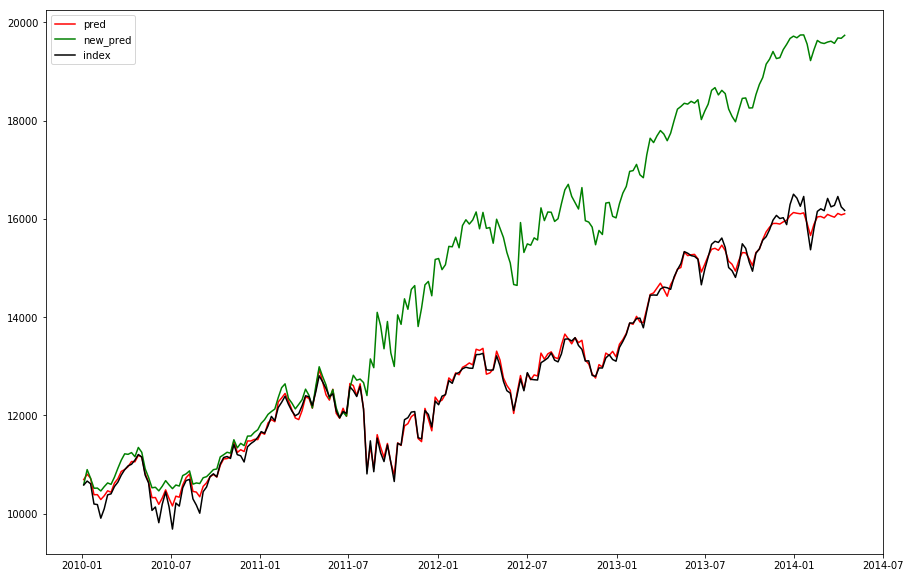

In [15]:
plt.figure(figsize=(15,10))
plt.plot(df['pred'], 'r', label = 'pred')
plt.plot(df['new_pred'], 'g', label = 'new_pred')
#plt.plot(en.inverse_transform(df['new_index']), 'b', label = 'new index')
plt.plot(df['^DJI'], 'k', label = 'index')
plt.legend()
plt.show()